# Laplace equations
## Physics 481 Fall 2017 - Midterm exam

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

From Griffiths Chapter 3

The primary task of electrostatics is to find the electric field of a given charge distribution.  In principle, this purpose is accomplished by Coulomb's law in the form

 $$ \vec E( \vec r) =  \frac{1}{4\pi\epsilon_0} \int \frac{\hat R}{R^2} \rho(\vec r') d\tau' $$

where $\vec r$ is the field location, $\vec r'$ is the charge location, and

 $$ \vec R = \vec r - \vec r' $$


Unfortunately, integrals of this type can be difficult to calculate for any but the simplest charge distributions.  Occasionally we can get around this by exploiting symmetry and using Gauss's law, but ordinarily the best strategy is first to calculate the potential, $V$, which is given by the somewhat more tractable equation

 $$ V( \vec r) =  \frac{1}{4\pi\epsilon_0} \int \frac{1}{R} \rho(\vec r') d\tau $$
 
Still, even this integral is often too tough to handle analytically.  Moreover, in problems involving conductors $\rho$ itself may not be known in advance; since charge is free to move around, the only thing we control directly is the total charge (or perhaps the potential of each conductor.

In such cases, it is fruitful to recast the problem in differential form, using Poisson's equation

  $$ \nabla^2 V = -\frac{\rho}{\epsilon_0} $$
  
Very often, in fact, we are interested in finding the potential in a region where $\rho=0$.  In this case, Poisson's equation reduces to Laplace's equation

  $$ \nabla^2 V = 0 $$
  
or, written out in Cartesian coordinates

  $$ \frac{\partial^2 V}{\partial x^2} + \frac{\partial^2 V}{\partial y^2} +  \frac{\partial^2 V}{\partial z^2} = 0 $$


## Laplace 1D

Suppose $V$ depends on only one variable, $x$.  Then Laplace's equation becomes

  $$ \frac{\partial^2 V}{\partial x^2} = 0 $$

The general solution is  

  $$ V(x) = m x + b $$

If we only consider discrete locations

  $$ x_i = i \Delta x $$

then we can approximate the first derivative with

  $$ \frac{\partial V}{\partial x}  \approx \frac{V(x_{i+1}) - V(x_i)}{x_{i+1} - x_{i}} \approx \frac{V_{i+1} - V_i}{\Delta x} $$ 

and the second derivative with

$$ \frac{\partial^2 V}{\partial x^2}  \approx  \left . \frac{\partial V}{\partial x} \right |_{x_{i+1}} -  \left . \frac{\partial V}{\partial x} \right |_{x_i}
\approx 
\frac{V_{i+1} - 2V_i + V_{i-1}}{\Delta x^2}
$$
  
In regions where $\rho=0$ Laplace's equation reduces to

 $$  V_i = \frac{V_{i-1} + V_{i+1}}{2} $$
 
so that the potential at any given location should be equal to the average of the nearest neighbors.  This suggests that we might be able to use an iterative approach to solve for the potential profile.

To start, we create an array which contains the potential at some number $N$ of points.  We then set the boundary conditions for the first and last elements.  Next, we "sweep" through the array and replace every interior (non-boundary) value with the average of the two neighbors.  After some number of repeated sweeps we should be converging towards the correct value.

The two figures below show the results of this approach.  After about 5000 iterations the numerical solution differs from the expected value by less than 1 millivolt.

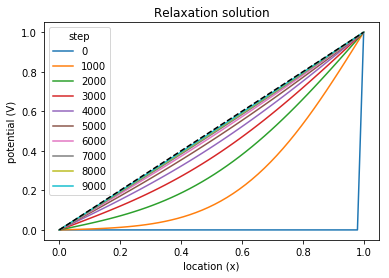

In [2]:
x = np.linspace(0, 1.0, 99)
v = np.zeros( len(x) )
v[0] , v[-1] = 0.0, 1.0

nsteps = 9999
for indx in range(nsteps):
    v[1:-1] = (v[0:-2] + v[2:] ) /2.0
    if (indx % 1000 == 0): 
        plt.plot(x, v, label=str(indx))
        
plt.legend(title='step')
plt.xlabel('location (x)')
plt.ylabel('potential (V)')
plt.title('Relaxation solution')

plt.plot(x, x, 'k--')  # expected value

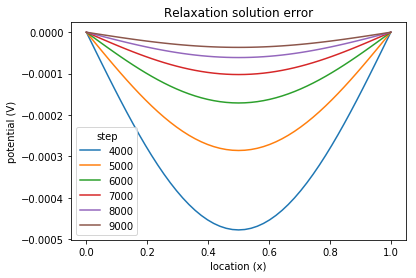

In [6]:
nsteps = 9999
for indx in range(nsteps):
    v[1:-1] = (v[0:-2] + v[2:] ) /2.0
    if (indx > 3000 and indx % 1000 == 0): 
        plt.plot(x, v-x, label=str(indx))
plt.legend(title='step')
plt.xlabel('location (x)')
plt.ylabel('potential (V)')
plt.title('Relaxation solution error')

### Task 1: 
Write a python function to solve Laplace's equation in 1-dimension for V(x=0)=0 and V(x=1)=1.  Examine the convergence rate by plotting error versus number of iterations.

Optional: consider alternative approaches, such as using numpy.convolve or matrix multiplication.

In [ ]:
def model(V,x):
    dVdt=0
y0=0

## Laplace 2D

In two dimensions, Laplace's equation reduces to

  $$ \frac{\partial^2 V}{\partial x^2} + \frac{\partial^2 V}{\partial y^2} = 0 $$

We can replace the continous spatial dimensions by a lattice with finite spacing

  $$ x_i = i \Delta x $$
  $$ y_j = j \Delta y $$

to see that the potential at each point is given by the average at the closest adjoining sites

 $$ V(x_i, y_j) = V_{i,j} = \frac{V_{i-1,j} + V_{i+1,j} + V_{i,j-1} + V_{i,j+1}}{4} $$

### Griffiths example 3.4: 
Two infinitely long grounded metal plates lie parallel to the $x-z$ plane, one at $y=0$, the other at $y=a=5cm$.  They are connected at $x=\pm b=\pm 4cm$ by metal strips maintained at a constant potential $V_0=4 volts$ to form a rectangular channel.  A thin layer of insulation at each corner allows the sides to be maintained at different potentials.

A solution to this boundary value problem can be obtained through separation of variables

  $$ V(x,y) = \frac{4 V_0}{\pi} \sum_{n=1,3,5,...} \frac{1}{n} \frac{\cosh(n \pi x / a)}{\cosh (n \pi b / a)} \sin(n \pi y / a)$$

### Task 2:
Obtain a numerical solution to Laplace's equation in 2D for Griffiths example 3.4 and compare to the analytic result.

### Task 3:
A coaxial cable has inner conductor radius of $r_a=1mm$ and outer conductor radius of $r_b=5mm$.  Assume that the outer conductor is grounded and the inner conductor is at potential $V_0=9 volts$.

Obtain a numerical solution to Laplace's equation in the region between the inner and outer conductors.  Plot and discuss.

What is the potential midway between the inner and outer conductors (at $r=3mm$)?  